In [1]:
import sys
sys.path.append('D:/v1ktop/Drive/REPOS/augmentation_ap/')

In [2]:
from preprocesing.load_datasets import Dataset

In [3]:
 %load_ext autoreload

In [4]:
 %autoreload 2

## Cargar folds

In [5]:
key="anorexia18_dev"

In [6]:
data_cls=Dataset(key=key, remove_end=True, chunking=True, doc_len=64, min_len=32)

## Explore data

In [7]:
from classifier.explore_data import explore_data
from classifier.FeactureExtraction import feature_extraction
from classifier.SVM_Text import SVM_text

In [8]:
all_training= data_cls.get_dataset(folder_name="prep_chunks_joined", truth_name="train_golden_truth_joined.txt",
                              partition="training")

In [9]:
exp_cls=explore_data(all_training[0], all_training[1], "D:/", plot_format="png")

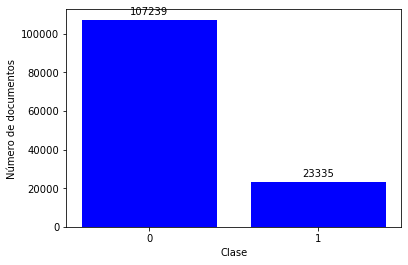

In [10]:
exp_cls.plot_class_distribution()

## Palabras dependientes de la clase incluyendo palabras de paro con p<0.001

In [11]:
ft=feature_extraction(all_training[0], w_range=(1,1), stop_wors=None, use_idf=True)

In [12]:
top_words_with_stop=ft.get_chi_2(all_training[1], k=1081, return_scores=True)

In [13]:
print("Numero de palabras")
len(top_words_with_stop)

Numero de palabras


1081

In [14]:
top_words_with_stop[0:100]

,score
eating,1330.065124
weight,1256.776124
my,765.698959
eat,759.046387
disorder,697.528293
...,...
lunch,89.625675
game,89.620782
recovered,88.951721
medication,88.850116


In [15]:
top_words_with_stop[-100:-1]

,score
lactose,11.365255
bowel,11.350109
psychiatric,11.348017
clip,11.324138
ug,11.311029
...,...
recipes,10.431711
la,10.429967
perfectionist,10.408205
maudsley,10.403774


In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
#! pip install multidict

In [18]:
import multidict as multidict

In [19]:
def getFrequencyDictForText(table):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for index, row in table.iterrows():
        tmpDict[index] = int(row)
        
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [20]:
def generate_text(table):
    text=[]
    for index, row in table.iterrows():
        text.append((index+" ")*int(row))
    return " ".join(text)
    

In [21]:
gtext=generate_text(top_words_with_stop[0:50])

In [22]:
wc = WordCloud(background_color="white", max_words=50, mask=None, max_font_size=150, width=1200, height=720)

In [23]:
wc.generate_from_frequencies(getFrequencyDictForText(top_words_with_stop))

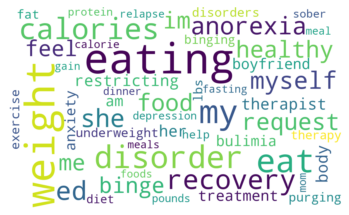

In [24]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
wc.to_file("D:/chi2_words_anorexia.eps")

## Clasificación con CHI2 considerando palabras de paro

In [32]:
data_cls.dataset=data_cls.DATASETS["anorexia18_test"]

In [34]:
test=\
data_cls.get_dataset(folder_name="prep_chunks", truth_name="test_golden_truth.txt",
                             partition="test")

In [37]:
len(test[])

271391

In [41]:
svm= SVM_text(all_training[0], all_training[1], True)

In [47]:
test[1]

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
svm.extract_features(test[0], feature="word", method="tf-idf", nrange1=(1,1) , nrange2=None, 
     k=len(top_words_with_stop), stop_words=None, norm="l2", idf=True, feature_selection=True, reduce_method="Xi")


# Features:  (130574, 1081)
Training:  (130574, 1081)
Testing:  (271391, 1081)


In [59]:
score= svm.train_and_test(test[1], p_label="1", reference_data=test[3])

In [60]:
score

[1081, 0.9484662576687116, 0.6631578947368421, 0.863013698630137, 0.75]

## Distribución en la clase positiva

In [52]:
positive_docs=[]
positive_labels=[]

In [55]:
for doc, label  in zip(all_training[0],all_training[1]):
    if label==1:
        positive_docs.append(doc)
        positive_labels.append(label)
        

In [56]:
len(positive_docs)

31396

In [57]:
exp_cls_p=explore_data(positive_docs, positive_labels, "D:/", plot_format="png")

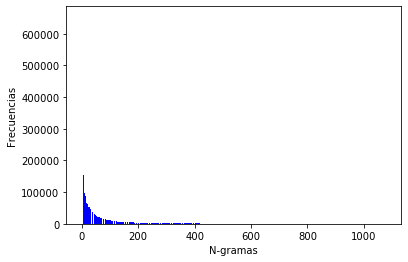

In [58]:
exp_cls.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=False, word_list=top_words_with_stop)

### Frecuencia en ambas clases

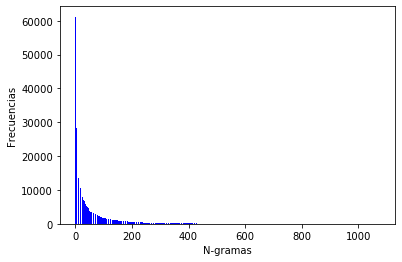

In [59]:
exp_cls_p.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=False, word_list=top_words_with_stop)

### Frecuencia por documentos

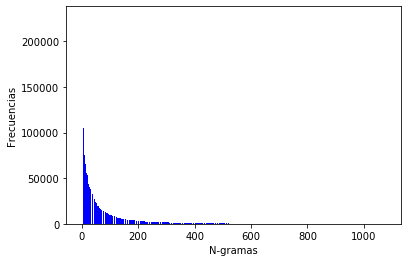

In [60]:
exp_cls.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop)

### Clase positiva

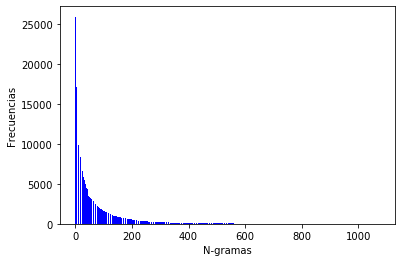

In [61]:
exp_cls_p.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop)

In [ ]:
negative_docs=[]
negative_labels=[]

In [ ]:
for doc, label in zip(docs, labels):
    if label==0:
        negative_docs.append(doc)
        negative_labels.append(label)
        

In [ ]:
len(negative_docs)

In [ ]:
exp_cls_n=explore_data(negative_docs, negative_labels, "D:/", plot_format="png")

In [ ]:
exp_cls_n.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)